# Selection and Analysis of neutrino-Ar CCQE scattering with a single proton production
April 30, 2017

In [1]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks'); sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from notebooks_tools import * 
%matplotlib inline

In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/ClassificationOfCC1p/Figures/'

# 2-tracks clusters

In [3]:
MCBNBextBNB = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_CC1pTopology_MCC8_MC_BNB_extBNB.csv')
MCBNBextBNB_in_FV = sample_in_FV(MCBNBextBNB)
print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events + extBNB'
print len(MCBNBextBNB_in_FV),'2-tracks clusters from MC-BNB events + extBNB in FV'

39881 2-tracks clusters from MC-BNB events + extBNB
25827 2-tracks clusters from MC-BNB events + extBNB in FV


In [4]:
MCBNBextBNB = MCBNBextBNB_in_FV
print len(MCBNBextBNB),'2-tracks clusters from MC-BNB events + extBNB'

TrueCC1p = MCBNBextBNB[MCBNBextBNB.GENIECC1p==True]
print len(TrueCC1p), 'are true (GENIE) cc1p, ',float(100*float(len(TrueCC1p))/len(MCBNBextBNB)),'%'

CC1pDetected = MCBNBextBNB[MCBNBextBNB.Is1mu1p==True]
print len(CC1pDetected), 'are 2-tracks clusters of 1µ1p',float(100*float(len(CC1pDetected))/len(MCBNBextBNB)),'%'

NonCC1p = MCBNBextBNB[(MCBNBextBNB.Non1mu1p==True) & (MCBNBextBNB.pdg_long!=-9999) & (MCBNBextBNB.pdg_short!=-9999) ]
print len(NonCC1p), 'are 2-tracks not 1µ1p',float(100*float(len(NonCC1p))/len(MCBNBextBNB)),'%'

extPairs = MCBNBextBNB[(MCBNBextBNB.pdg_long==-9999) | (MCBNBextBNB.pdg_short==-9999)]
print len(extPairs), 'are 2-tracks with unrecognized pdg code (extBNB)',float(100*float(len(extPairs))/len(MCBNBextBNB)),'%'

print len(TrueCC1p) + len(CC1pDetected) + len(NonCC1p) + len(extPairs)

samples = [TrueCC1p , CC1pDetected, NonCC1p , extPairs]
labels = ['true CC1p' , '1$\\mu$1p non CC1p' , 'non 1$\\mu$1p' , 'cosmic data' ]
cmaps = ['Blues' , 'Greens', 'Reds' , 'Purples']
colors = ['blue' , 'green', 'red' , 'purple']

25827 2-tracks clusters from MC-BNB events + extBNB
685 are true (GENIE) cc1p,  2.65226313548 %
2558 are 2-tracks clusters of 1µ1p 9.90436365044 %
3208 are 2-tracks not 1µ1p 12.4211096914 %
19376 are 2-tracks with unrecognized pdg code (extBNB) 75.0222635227 %
25827


In [5]:
pureff_df = pd.DataFrame(columns=['cut','$\mu-p$ pur.','$\mu-p$ eff.','CC1p pur.','CC1p eff.'])

# samples_after_cuts = [sample for sample in samples]
reduced_samples = dict()
reduced_samples['no cuts'] = [sample for sample in samples]
# cut 1 
# ------------
# cuts on PIDa
print '------------'
print 'cut 1: PIDa(µ) vs PIDa(p)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['no cuts'],samples,labels):
    reduced = sample
    reduced = reduced[(((reduced['PIDA_assigned_muon']<-2.000000*reduced['PIDA_assigned_proton']+(22.000000))                               
                      &(reduced['PIDA_assigned_muon']<1.142857*reduced['PIDA_assigned_proton'])                     
                      &(reduced['PIDA_assigned_muon']>0))==False)]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 1'] = samples_after_cuts



# cut 2
# ------------
# lµ vs lp
print '------------'
print 'cut 2: l(µ) vs l(p)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 1'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['l_small_pida']>4]
    reduced=reduced[reduced['l_large_pida']<120]
    reduced=reduced[reduced['l_large_pida']>8]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 2'] = samples_after_cuts



# cut 3
# ------------
# no-collinearity: cut on angle between tracks
print '------------'
print 'cut 3: no-collinearity'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 2'],samples,labels):
    reduced = sample[np.abs(180./np.pi*sample['2_tracks_angle']-90)<60]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0),'%'
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 3'] = samples_after_cuts




# cut 4
# ------------
# Delta-Q
print '------------'
print 'cut 4: dQ_tracks/dQ_tot(u) vs dQ_tracks/dQ_tot(u)'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 3'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_v']>-1.000000*reduced['ratio_dQassociated_dQtot_ROI_20x40_AroundVertex_u']+1.500000]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 4'] = samples_after_cuts



# cut 5
# ------------
# Delta-phi vs. theta_pq
print '------------'
print 'cut 5: |Delta-phi-180|<30'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 4'],samples,labels):
    reduced=sample
    reduced=reduced[np.abs(reduced['delta_phi']-180.000)<30]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 5'] = samples_after_cuts



# cut 5
# ------------
# Delta-phi vs. theta_pq
print '------------'
print 'cut 6: theta_pq<25'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 5'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['reco_CC1p_theta_pq_fromE']<25]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 6'] = samples_after_cuts







# modified cut 5
# ------------
# Delta-phi vs. p_t
print '------------'
print 'modified cut 5: Delta-phi vs. p_t'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 4'],samples,labels):
    reduced=sample
    reduced=reduced[np.abs(reduced['delta_phi']-180.000)<30]
    reduced=reduced[reduced['reco_CC1p_Pt']<0.35]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['modified cut 5'] = samples_after_cuts




# tight Pt cut for good Ev reconstruction
# ------------
# p_t
print '------------'
print 'cut 7: tight Pt cut for good Ev reconstruction'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 6'],samples,labels):
    reduced=sample
    reduced=reduced[reduced['reco_CC1p_Pt']<0.15]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['cut 7'] = samples_after_cuts




# W2 vs. Pt cut for good Ev reconstruction
# ------------
print '------------'
print 'modified cut 7: W2 vs. Pt cut for good Ev reconstruction'
samples_after_cuts,frac,number = [],[],[]
for i,sample,original_sample,label in zip(range(4),reduced_samples['cut 6'],samples,labels):
    reduced=sample
    reduced=reduced[(reduced['reco_CC1p_W2_fromE'] > -18.33 * reduced['reco_CC1p_Pt'] + 3.6 )
                   &(reduced['reco_CC1p_W2_fromE'] < 1.33 * reduced['reco_CC1p_Pt'] + 1.24 )
                   &(reduced['reco_CC1p_W2_fromE'] < -18.33 * reduced['reco_CC1p_Pt'] + 15.4 )
                   &(reduced['reco_CC1p_W2_fromE'] > 1.33 * reduced['reco_CC1p_Pt'] + 0.65 )]
    reduced_len = float(len(reduced))
    number.append(reduced_len)
    frac.append(100.0 * reduced_len / len(original_sample))
    print label,"retained %.1f"%frac[-1] + "% "+"in this cut (%d"%int(reduced_len)+")"
    samples_after_cuts.append(reduced)
print 'efficiency:%.1f'%frac[0], ', purity:%.1f'%(100.*float(number[0])/np.sum(number) if np.sum(number) else 0)
print 'mu-p eff.:%.1f'%(100.*float(number[0]+number[1])/(len(samples[0])+len(samples[1]))), ', mu-p pur.:%.1f'%(100.*float(number[0]+number[1])/np.sum(number) if np.sum(number) else 0)
reduced_samples['modified cut 7'] = samples_after_cuts

------------
cut 1: PIDa(µ) vs PIDa(p)
true CC1p retained 94.7% in this cut (649)
1$\mu$1p non CC1p retained 94.6% in this cut (2419)
non 1$\mu$1p retained 59.1% in this cut (1896)
cosmic data retained 23.0% in this cut (4463)
efficiency:94.7 , purity:6.9
mu-p eff.:94.6 , mu-p pur.:32.5
------------
cut 2: l(µ) vs l(p)
true CC1p retained 77.8% in this cut (533)
1$\mu$1p non CC1p retained 72.1% in this cut (1844)
non 1$\mu$1p retained 43.9% in this cut (1409)
cosmic data retained 14.7% in this cut (2848)
efficiency:77.8 , purity:8.0
mu-p eff.:73.3 , mu-p pur.:35.8
------------
cut 3: no-collinearity
true CC1p retained 74.9% in this cut (513)
1$\mu$1p non CC1p retained 65.7% in this cut (1681)
non 1$\mu$1p retained 26.2% in this cut (840)
cosmic data retained 2.8% in this cut (538)
efficiency:74.9 , purity:14.4 %
mu-p eff.:67.7 , mu-p pur.:61.4
------------
cut 4: dQ_tracks/dQ_tot(u) vs dQ_tracks/dQ_tot(u)
true CC1p retained 67.2% in this cut (460)
1$\mu$1p non CC1p retained 36.9% in thi

## Ev reconstruction

In [6]:
def find_fraction_of_good_Ev( sample=None, good_percentage=15 ):
    Ngood = len(sample[np.abs(sample)<good_percentage])
    fgood = float(Ngood) / len(sample)
    print "%.1f"%(100.*fgood),'% with ratio<',good_percentage,'%'
    return fgood

20.0 % with ratio< 8 %
26.5 % with ratio< 8 %
30.7 % with ratio< 8 %


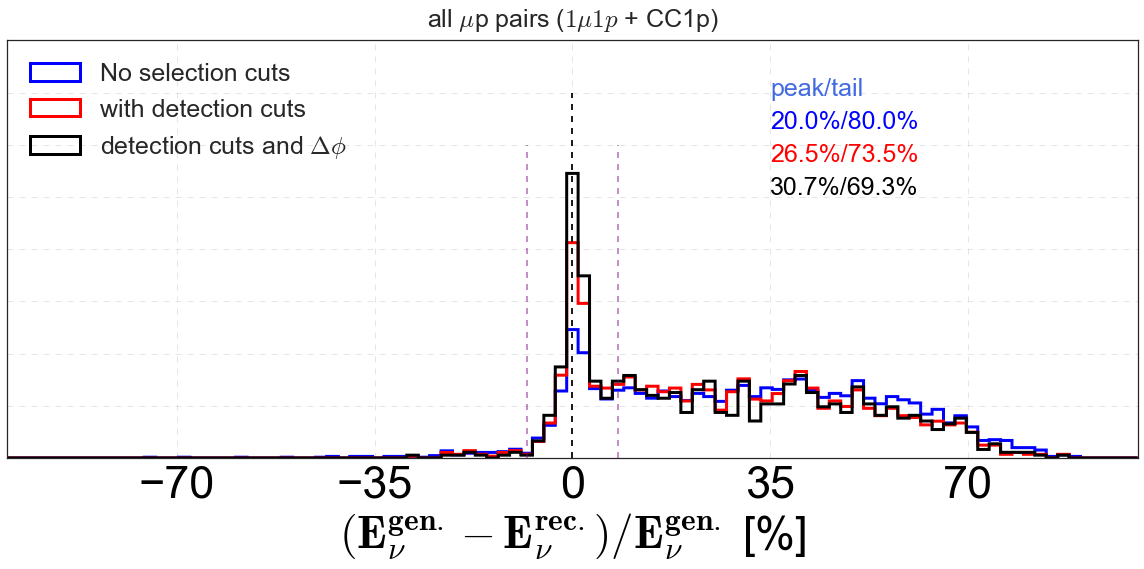

In [13]:
# before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,100)
mu_p_before_cuts =  pd.concat([reduced_samples['no cuts'][0],reduced_samples['no cuts'][1]])
mu_p_after_detection_cuts =  pd.concat([reduced_samples['cut 4'][0],reduced_samples['cut 4'][1]])
mu_p_after_cuts =  pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])
fgood_arr = []
for sample,label,color in zip([ mu_p_before_cuts,mu_p_after_detection_cuts, mu_p_after_cuts ]
                        ,['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$'],
                             ['blue','red','black']):
    ratio = 100*(sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['truth_Ev']
    h,bins,_=plt.hist( ratio , bins=bins, label=label, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( 35 , 1.05*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='royalblue' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,['blue','red','black']):    
    plt.text( 35 , 1.05*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%'  , fontsize=25 , color=color )
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.set_title('all $\\mu$p pairs ($1\\mu 1p$ + CC1p)',fontsize=25,y=1.02)
ax.legend(loc='upper left',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructed.pdf')

20.0 % with ratio< 8 %
26.5 % with ratio< 8 %
30.7 % with ratio< 8 %


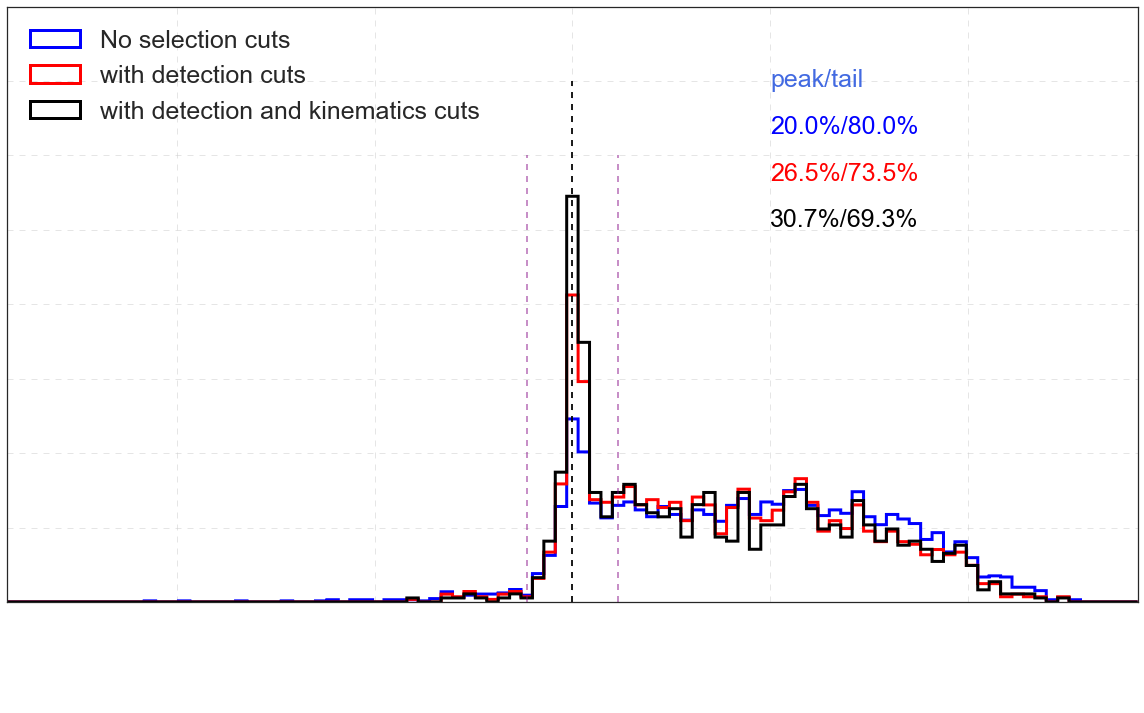

In [9]:
# for presentations  - white background
# before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,10))
bins = np.linspace(-100,100,100)
mu_p_before_cuts =  pd.concat([reduced_samples['no cuts'][0],reduced_samples['no cuts'][1]])
mu_p_after_detection_cuts =  pd.concat([reduced_samples['cut 4'][0],reduced_samples['cut 4'][1]])
mu_p_after_cuts =  pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])
fgood_arr = []
for sample,label,color in zip([ mu_p_before_cuts,mu_p_after_detection_cuts, mu_p_after_cuts ]
                        ,['No selection cuts','with detection cuts','with detection and kinematics cuts'],
                             ['blue','red','black']):
    ratio = 100*(sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['truth_Ev']
    h,bins,_=plt.hist( ratio , bins=bins, label=label, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( 35 , 1.05*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='royalblue' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,['blue','red','black']):    
    plt.text( 35 , 1.05*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%'  , fontsize=25 , color=color )
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='upper left',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='white',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()

48.9 % with ratio< 8 %
33.9 % with ratio< 8 %
18.6 % with ratio< 8 %
13.0 % with ratio< 8 %


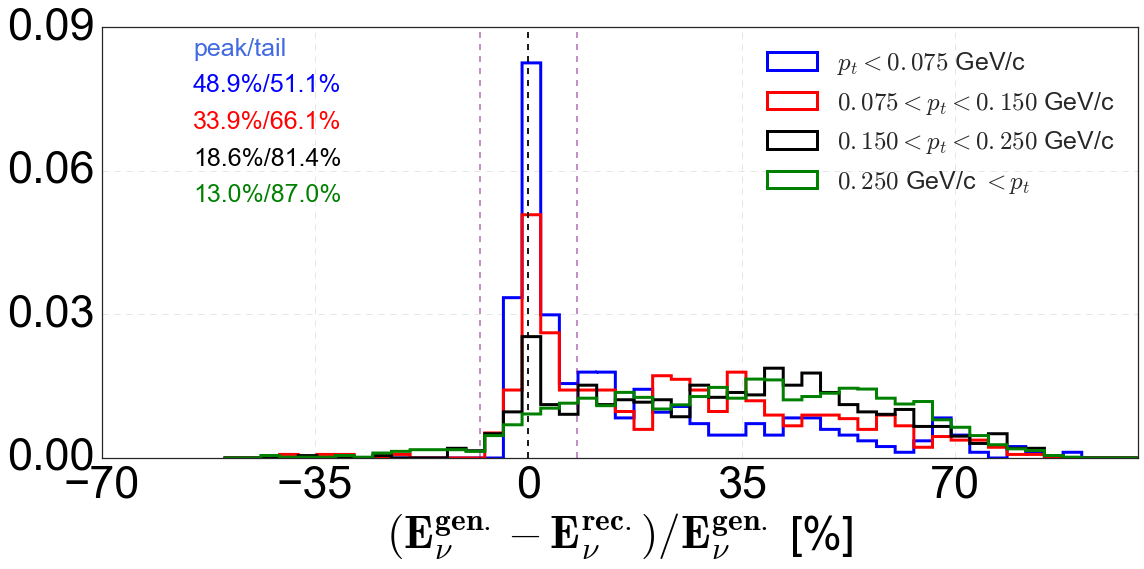

In [8]:
# In Pt bins
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
fgood_arr = []
for sample,label,color in zip([ mu_p_before_cuts[mu_p_before_cuts['reco_CC1p_Pt']<0.075]
                         ,mu_p_before_cuts[(mu_p_before_cuts['reco_CC1p_Pt']>0.075)&(mu_p_before_cuts['reco_CC1p_Pt']<0.15)] 
                         ,mu_p_before_cuts[(mu_p_before_cuts['reco_CC1p_Pt']>0.15)&(mu_p_before_cuts['reco_CC1p_Pt']<0.25)] 
                         ,mu_p_before_cuts[mu_p_before_cuts['reco_CC1p_Pt']>0.25]]
                        ,['$p_{t}<0.075$ GeV/c','$0.075<p_{t}<0.150$ GeV/c','$0.150<p_{t}<0.250$ GeV/c','$0.250$ GeV/c $<p_{t}$']
                             ,['blue','red','black','green','magenta']):
    ratio = 100*(sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['truth_Ev']
    plt.hist( ratio , bins=bins, label=label, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='royalblue' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,['blue','red','black','green','magenta']):    
    plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%' , fontsize=25 , color=color )

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='upper right',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructedBinsPt.pdf')

57.9 % with ratio< 8 %
46.1 % with ratio< 8 %
26.7 % with ratio< 8 %
9.1 % with ratio< 8 %


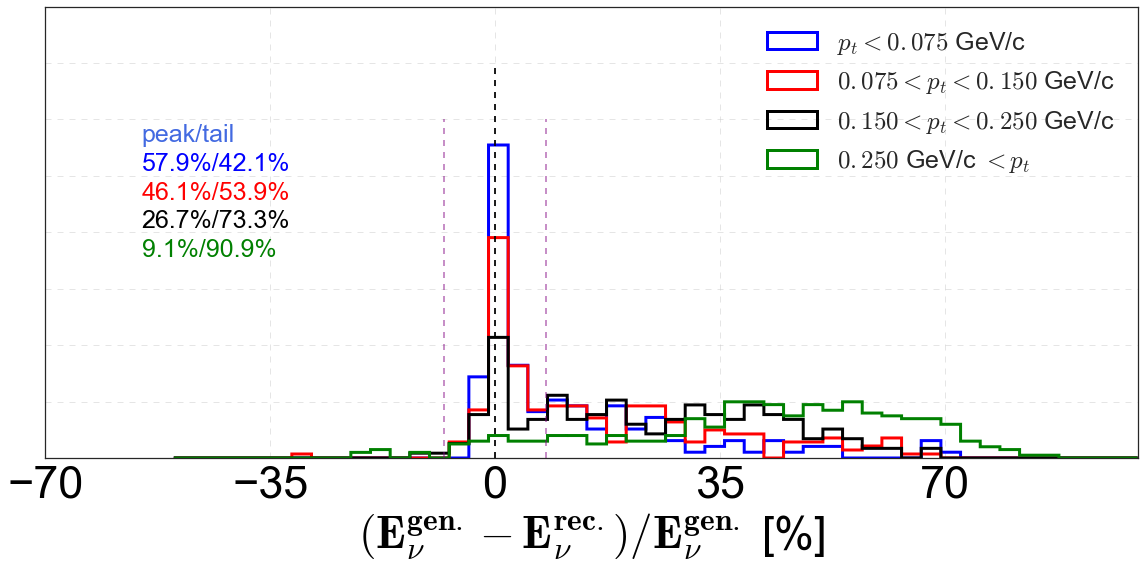

In [12]:
# for presentations (white background)
# In Pt bins after cuts
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p_after_cuts =  pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])

fgood_arr = []
for sample,label,color in zip([ mu_p_after_cuts[mu_p_after_cuts['reco_CC1p_Pt']<0.075]
                         ,mu_p_after_cuts[(mu_p_after_cuts['reco_CC1p_Pt']>0.075)&(mu_p_after_cuts['reco_CC1p_Pt']<0.15)] 
                         ,mu_p_after_cuts[(mu_p_after_cuts['reco_CC1p_Pt']>0.15)&(mu_p_after_cuts['reco_CC1p_Pt']<0.25)] 
                         ,mu_p_after_cuts[mu_p_after_cuts['reco_CC1p_Pt']>0.25]]
                        ,['$p_{t}<0.075$ GeV/c','$0.075<p_{t}<0.150$ GeV/c','$0.150<p_{t}<0.250$ GeV/c','$0.250$ GeV/c $<p_{t}$']
                             ,['blue','red','black','green','magenta']):
    ratio = 100*(sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['truth_Ev']
    plt.hist( ratio , bins=bins, label=label, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='royalblue' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,['blue','red','black','green','magenta']):    
    plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%' , fontsize=25 , color=color )

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='upper right',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructedBinsPt_after_cut_5.pdf')

55.3 % with ratio< 8 %
36.9 % with ratio< 8 %
11.2 % with ratio< 8 %


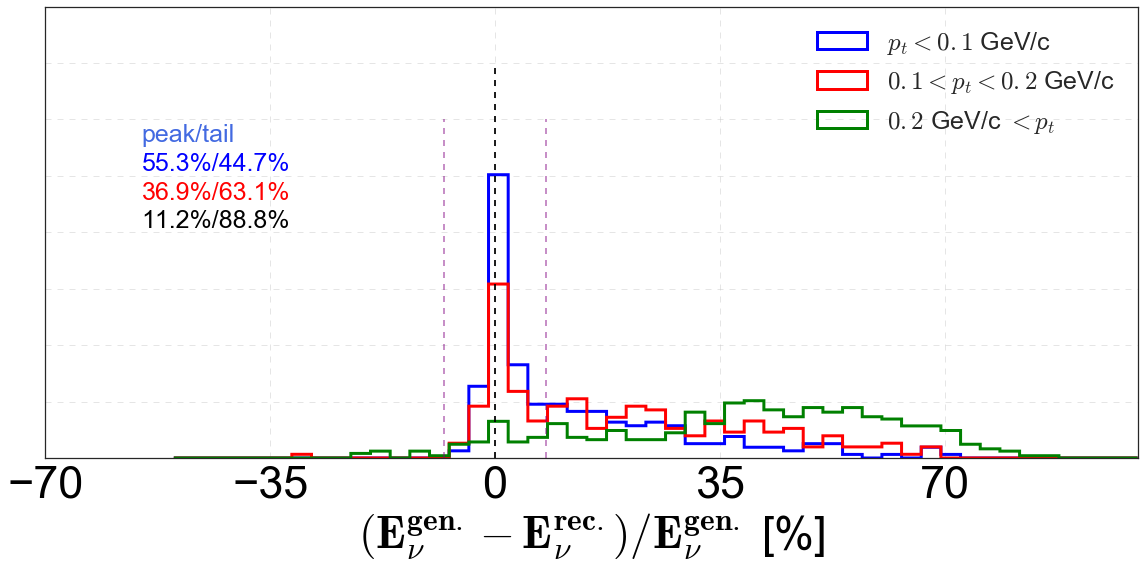

In [10]:
# for presentations 
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p_after_cuts =  pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])

fgood_arr = []
for sample,label,color in zip([ mu_p_after_cuts[mu_p_after_cuts['reco_CC1p_Pt']<0.1]
                         ,mu_p_after_cuts[(mu_p_after_cuts['reco_CC1p_Pt']>0.1)&(mu_p_after_cuts['reco_CC1p_Pt']<0.2)] 
                         ,mu_p_after_cuts[mu_p_after_cuts['reco_CC1p_Pt']>0.2]]
                        ,['$p_{t}<0.1$ GeV/c','$0.1<p_{t}<0.2$ GeV/c','$0.2$ GeV/c $<p_{t}$']
                             ,['blue','red','green']):
    ratio = 100*(sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['truth_Ev']
    plt.hist( ratio , bins=bins, label=label, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='royalblue' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,['blue','red','black','green','magenta']):    
    plt.text( -55 , 0.85*np.max(ax.get_ylim())*(1-0.1*i) , '%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%' , fontsize=25 , color=color )

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
ax.legend(loc='upper right',fontsize=25)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]',ticks_color='black',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()

30.7 % with ratio< 8 %
36.6 % with ratio< 8 %
51.2 % with ratio< 8 %


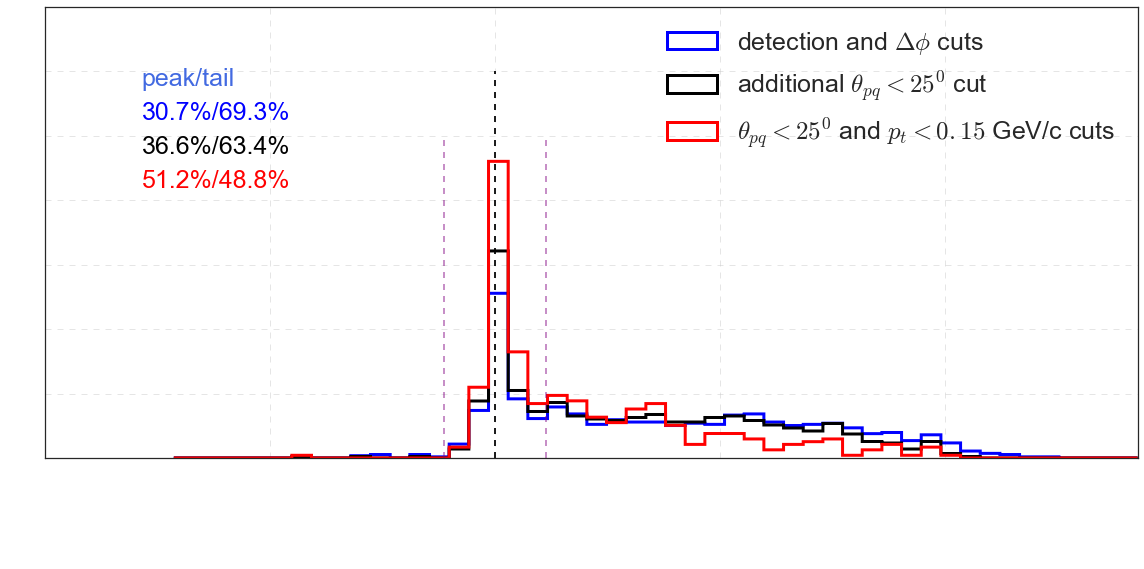

In [16]:
# after Pt<0.15 cut
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p_after_cuts =  pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])
mu_p_after_theta_pq_cut =  pd.concat([reduced_samples['cut 6'][0],reduced_samples['cut 6'][1]])
mu_p_after_Pt_cut =  pd.concat([reduced_samples['cut 7'][0],reduced_samples['cut 7'][1]])


fgood_arr = []
for sample,label,color in zip([mu_p_after_cuts,mu_p_after_theta_pq_cut,mu_p_after_Pt_cut]
                             ,['detection and $\\Delta \\phi$ cuts','additional $\\theta_{pq}<25^0$ cut','$\\theta_{pq}<25^0$ and $p_t<0.15$ GeV/c cuts']
                             ,['blue','black','red']):
    ratio = 100*(sample['truth_Ev'] - sample['reco_CC1p_Ev_fromE'])/sample['truth_Ev']
    plt.hist( ratio , bins=bins, label=label, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

plt.text( -55 , 1.05*np.max(ax.get_ylim())*(1.1) , 'peak/tail' , fontsize=25 , color='royalblue' )
for i,fgood,color in zip(range(len(fgood_arr)),fgood_arr,['blue','black','red']):    
    plt.text( -55 , 1.05*np.max(ax.get_ylim())*(1-0.1*i) ,'%.1f'%fgood+'%'+'/%.1f'%(100-fgood)+'%'  , fontsize=25 , color=color )

    
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'--',[-good_percentage,-good_percentage],ax.get_ylim(),'--',color='purple',alpha=0.5)
ax.grid(linestyle='--',alpha=0.5)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,'$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]'
         ,ticks_color='white',fontsize=45,nticklabels=4)
ax.xaxis.set_ticks([-70,-35,0,35,70]);
ax.yaxis.set_major_formatter(ticker.NullFormatter())
ax.legend(loc='upper right',fontsize=25)
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructedAfter_theta_pq_and_Pt_Cuts.pdf')

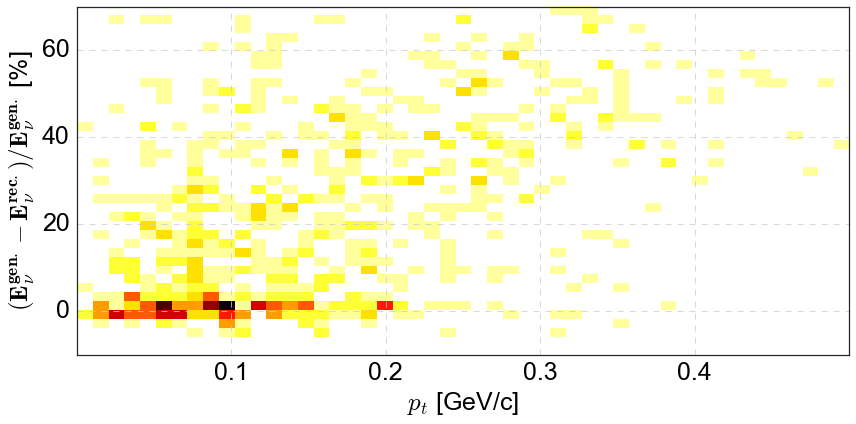

In [10]:
# 2d Ev vs. Pt
fig = plt.figure(figsize=(12,6))
bins=(np.linspace(0,.5,50),np.linspace(-10,70,40))
x_label,y_label='$p_{t}$ [GeV/c]','$\\bf{(E^{gen.}_{\\nu}-E^{rec.}_{\\nu})/E^{gen.}_{\\nu}}$ [%]'
mu_p_after_cuts =  pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])
ax = fig.add_subplot(1,1,1)
ratio = 100*(mu_p_after_cuts['truth_Ev'] - mu_p_after_cuts['reco_CC1p_Ev_fromE'])/mu_p_after_cuts['truth_Ev']
plot_2d_hist(mu_p_after_cuts['reco_CC1p_Pt'], ratio, ax=ax,fontsize=figures_fontsize,ticks_color='black',bins=bins,norm='')
set_axes(ax,x_label=x_label,y_label=y_label)
ax.xaxis.set_ticks([0.1,0.2,0.3,0.4])
ax.yaxis.set_ticks([0,20,40,60])
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructedVsPt.pdf')

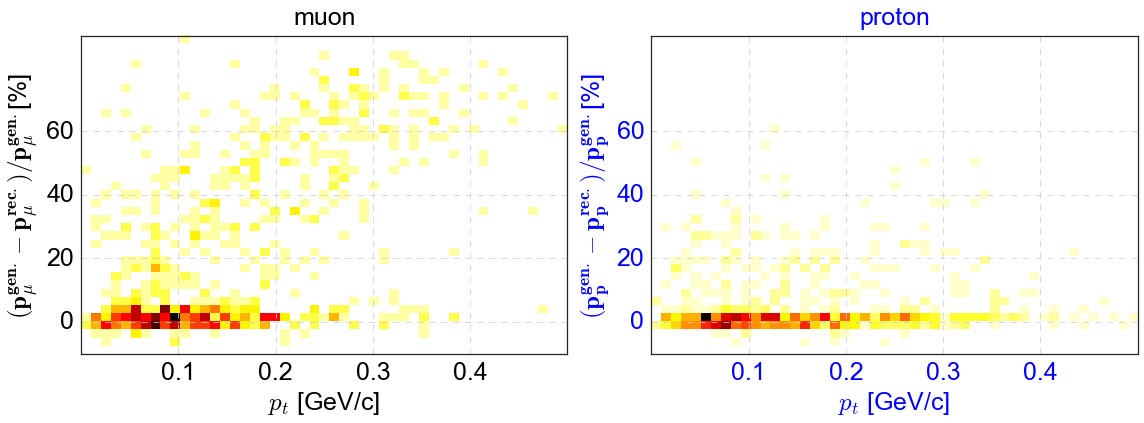

In [11]:
mu_p_after_cuts =  pd.concat([reduced_samples['cut 5'][0],reduced_samples['cut 5'][1]])

# 2d reconstructed momentum vs. Pt
fig = plt.figure(figsize=(16,6))
bins=(np.linspace(0,.5,50),np.linspace(-10,90,40))
x_label = '$p_{t}$ [GeV/c]'

for i,name,par,pname,color in zip(range(2),['muon','proton'],['mu','p'],['\\mu','p'],['black','blue']):
    
    ax = fig.add_subplot(1,2,i+1)
    y_label = '$\\bf{(p^{gen.}_{%s}-p^{rec.}_{%s})/p^{gen.}_{%s}}$'%(pname,pname,pname)+'[%]'
    ax.set_title(name,y=1.02,fontsize=25,color=color)
    ratio = 100*(mu_p_after_cuts['truth_P%s'%par] - mu_p_after_cuts['reco_CC1p_P%s'%par])/mu_p_after_cuts['truth_P%s'%par]
    plot_2d_hist(mu_p_after_cuts['reco_CC1p_Pt'], ratio, ax=ax,fontsize=figures_fontsize,bins=bins,norm='')
    set_axes(ax,x_label=x_label,y_label=y_label,ticks_color=color)
    ax.xaxis.set_ticks([0.1,0.2,0.3,0.4])
    ax.yaxis.set_ticks([0,20,40,60])
    ax.grid(linestyle='--',alpha=0.75)
    
plt.tight_layout()
fig.savefig(figures_path+'ReconstructedMomentumVsPt.pdf')